# <center>Womens Clothing E-Commerce Reviews</center>

In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# estimators
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model metrics
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skm


# cross validation
from sklearn.cross_validation import train_test_split

In [688]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [689]:
df.shape

(23486, 11)

In [690]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [692]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [693]:
df = df.rename(columns = {'Recommended IND': 'Recommended', 'Department Name': 'Product Category'})
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## <center>Exploratory Data Analysis</center>

### Categorical data

In [694]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [695]:
df['Product Category'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan], dtype=object)

In [696]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

### Age discretized

In [697]:
age = df['Age'].value_counts()
age.head()

39    1269
35     909
36     842
34     804
38     780
Name: Age, dtype: int64

In [698]:
#df['Age_bin'] = 0 #creates a column of 0
df.loc[((df['Age'] >= 17) & (df['Age'] < 26)) , 'Age_bin'] = '17 - 25' 
df.loc[((df['Age'] >= 26) & (df['Age'] < 34)) , 'Age_bin'] = '26 - 33'
df.loc[((df['Age'] >= 34) & (df['Age'] < 42)) , 'Age_bin'] = '34 - 41'
df.loc[((df['Age'] >= 42) & (df['Age'] < 50)) , 'Age_bin'] = '42 - 49'
df.loc[((df['Age'] >= 50) & (df['Age'] < 58)) , 'Age_bin'] = '50 - 57'
df.loc[((df['Age'] >= 58) & (df['Age'] < 66)) , 'Age_bin'] = '58 - 65'
df.loc[((df['Age'] > 66)), 'Age_bin'] = '66+ '

In [699]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name,Age_bin
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,26 - 33
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,34 - 41
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,58 - 65


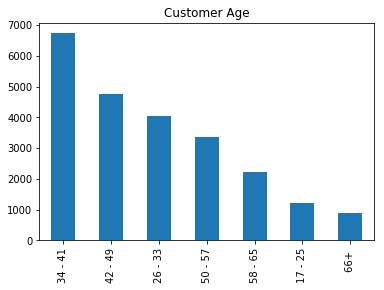

In [700]:
df['Age_bin'].value_counts().plot(kind = 'bar', title = 'Customer Age')

### Age vs. Recommendations

In [701]:
pd.crosstab(df['Age_bin'], df['Recommended'])

Recommended,0,1
Age_bin,,
17 - 25,182,1041
26 - 33,827,3213
34 - 41,1203,5525
42 - 49,908,3861
50 - 57,560,2790
58 - 65,313,1903
66+,148,736


Text(0.5,0,'')

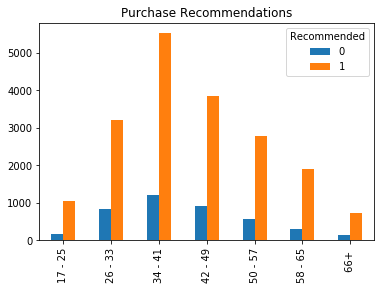

In [702]:
age_recomm = df.groupby(['Age_bin', 'Recommended']).size().unstack(1)
age_recomm.plot(kind = 'bar', title = 'Purchase Recommendations').set_xlabel("")

In [703]:
age_recomm['percent'] = (age_recomm[1]/(age_recomm[1] + age_recomm[0]))
age_recomm

Recommended,0,1,percent
Age_bin,,,
17 - 25,182,1041,0.851186
26 - 33,827,3213,0.795297
34 - 41,1203,5525,0.821195
42 - 49,908,3861,0.809604
50 - 57,560,2790,0.832836
58 - 65,313,1903,0.858755
66+,148,736,0.832579


### Recommendations

#### 82 % of the customers recommend their purchase 

In [704]:
df['Recommended'].sum() / len(df['Recommended'])

0.8223622583666865

### Age vs. Department Name

Text(0.5,0,'')

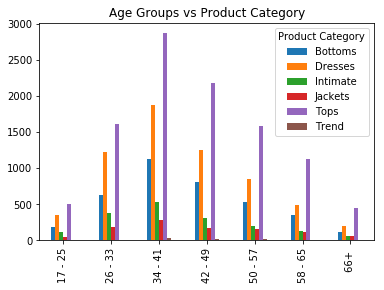

In [705]:
age_class = df.groupby(['Age_bin', 'Product Category']).size().unstack(1)
age_class.plot(kind = 'bar', title = 'Age Groups vs Product Category').set_xlabel("")

### Age vs. Class Name

Text(0.5,0,'')

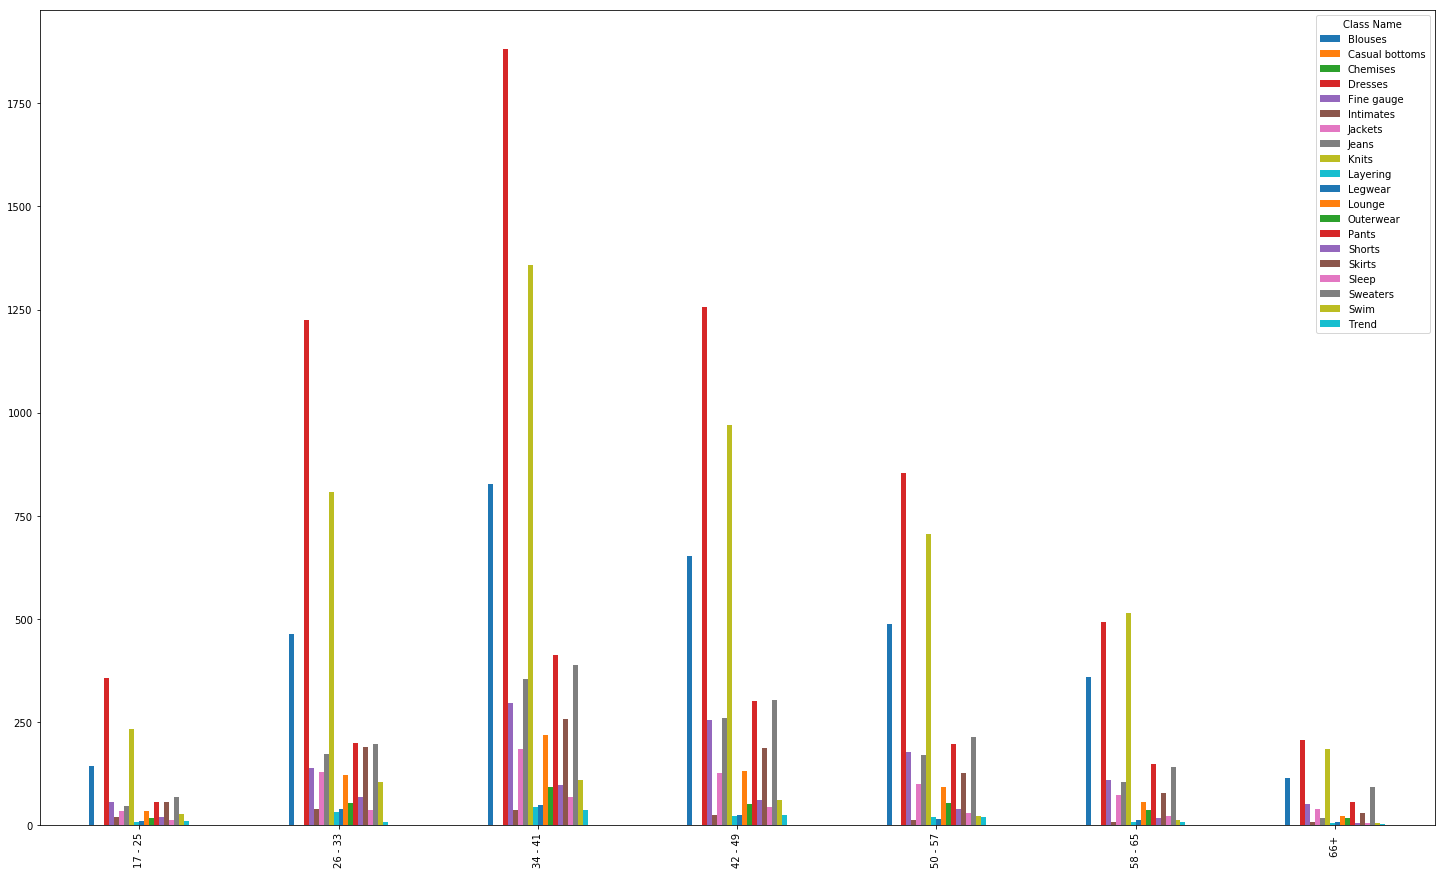

In [706]:
age_class = df.groupby(['Age_bin', 'Class Name']).size().unstack(1)
age_class.plot(kind = 'bar', figsize = (25,15)).set_xlabel("")

### The most popular products

In [707]:
popular_prod = df['Clothing ID'].value_counts()
popular_prod.head(10)

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
Name: Clothing ID, dtype: int64

In [708]:
# Dresses
prod_1078 = df.loc[df['Clothing ID'] == 1078]
prod_1078

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name,Age_bin
69,69,1078,56,Great summer fabric!,"I really wanted this to work. alas, it had a s...",3,0,1,General Petite,Dresses,Dresses,50 - 57
90,90,1078,51,Sweet flattering dress,"I love cute summer dresses and this one, espec...",4,1,0,General Petite,Dresses,Dresses,50 - 57
117,117,1078,32,NaN,This is the perfect summer dress. it can be dr...,5,1,2,General Petite,Dresses,Dresses,26 - 33
467,467,1078,61,Great sweater dress!,"Nice fit and flare style, not clingy at all. i...",5,1,1,General,Dresses,Dresses,58 - 65
470,470,1078,33,"Cute, but cheap",When i first opened this dress and tried it on...,3,0,0,General,Dresses,Dresses,26 - 33
474,474,1078,20,Super cute and flattering too,I love this sweater dress and get compliments ...,5,1,1,General,Dresses,Dresses,17 - 25
476,476,1078,52,Fun dress,Extremely flattering. an easy dress to wear - ...,5,1,1,General,Dresses,Dresses,50 - 57
486,486,1078,46,Fun mix of colors in the grey version,I ordered this dress in size xl in the grey/re...,5,1,1,General,Dresses,Dresses,42 - 49
492,492,1078,31,For the shorter girls,"I really wanted to love this dress, but it was...",4,1,4,General,Dresses,Dresses,26 - 33
497,497,1078,49,NaN,"Very cute, very comfortable. for me aesthetics...",5,1,2,General,Dresses,Dresses,42 - 49


In [709]:
# Knits
prod_862 = df.loc[df['Clothing ID'] == 862]
prod_862

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name,Age_bin
39,39,862,59,NaN,Great casual top with flare. looks cute with g...,5,1,0,General,Tops,Knits,58 - 65
40,40,862,47,NaN,Pretty and unique. great with jeans or i have ...,4,1,1,General,Tops,Knits,42 - 49
41,41,862,40,NaN,This is a beautiful top. it's unique and not s...,5,1,0,General,Tops,Knits,34 - 41
44,44,862,48,Beautiful!,Tried this on today at my local retailer and h...,5,1,9,General,Tops,Knits,42 - 49
45,45,862,43,Love the two tone design,I bought this item from online... the fit on t...,4,1,0,General,Tops,Knits,42 - 49
46,46,862,40,NaN,I love this top. i wear it all the time. the ...,5,1,0,General,Tops,Knits,34 - 41
49,49,862,33,Love the embroidery!,Really cute top! the embroidery on the collar ...,5,1,0,General,Tops,Knits,26 - 33
50,50,862,46,Cute for fall,This is a cute top that can transition easily ...,4,1,1,General,Tops,Knits,42 - 49
51,51,862,41,Love,I absolutely love this bib tee! it's probably ...,5,1,2,General,Tops,Knits,34 - 41
53,53,862,39,Flattering and comfortable,Very soft and comfortable. the shirt has an un...,5,1,34,General,Tops,Knits,34 - 41


In [710]:
# Dresses
prod_1094  = df.loc[df['Clothing ID'] == 1094]
prod_1094 

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name,Age_bin
178,178,1094,35,Not for me,The colors are vivid and perfectly autumnal bu...,2,0,0,General Petite,Dresses,Dresses,34 - 41
188,188,1094,54,"It's gorgeous, but...",Just came today: the print is gorgeous. very ...,4,1,0,General Petite,Dresses,Dresses,50 - 57
215,215,1094,39,Autumn fever,Ranna designs richly detailed dresses and this...,5,1,0,General Petite,Dresses,Dresses,34 - 41
218,218,1094,30,Falling goddess,This dress makes you feel like a bohemian godd...,5,1,0,General Petite,Dresses,Dresses,26 - 33
405,405,1094,40,Comfortable and dressy,I bought the dress that has the cream skirt wi...,5,1,1,General,Dresses,Dresses,34 - 41
410,410,1094,30,A perfect investment,I walked into retailer with low hopes of findi...,5,1,1,General,Dresses,Dresses,26 - 33
411,411,1094,53,This dress is gorgeous!,I was able to snatch this dress up just before...,5,1,3,General,Dresses,Dresses,50 - 57
560,560,1094,35,Gorgeous dress,I was hoping this would go on sale and now it ...,5,1,2,General,Dresses,Dresses,34 - 41
561,561,1094,34,A must buy!!,I tried this dress on and felt amazing in it. ...,5,1,0,General,Dresses,Dresses,34 - 41
563,563,1094,36,Prety dress that fits true to size,Wow the mixed reviews on this dress would make...,4,1,1,General,Dresses,Dresses,34 - 41


In [711]:
# Dresses
prod_1081  = df.loc[df['Clothing ID'] == 1081]
prod_1081

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name,Age_bin
74,74,1081,59,NaN,I passed up this dress so many times in the st...,5,1,1,General Petite,Dresses,Dresses,58 - 65
79,79,1081,62,So cute...but dry clean?!,This dress is adorable - it's a perfect casual...,4,1,2,General Petite,Dresses,Dresses,58 - 65
87,87,1081,39,True to size to large,I debated n that as i think it looks loose on ...,4,1,9,General Petite,Dresses,Dresses,34 - 41
93,93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses,26 - 33
109,109,1081,47,NaN,"Perfect dress for hot, humid, sticky weather.",5,1,0,General,Dresses,Dresses,42 - 49
111,111,1081,44,An almost for me...,I didn't end up keeping this dress...it just w...,3,1,4,General,Dresses,Dresses,42 - 49
113,113,1081,61,Cute and comfy,This dress is comfortable and stylish at the s...,5,1,3,General,Dresses,Dresses,58 - 65
131,131,1081,39,Just ok,"It's ok, fit doesn't wow me because of my body...",3,1,0,General,Dresses,Dresses,34 - 41
393,393,1081,53,"Lovely dress, small top, different color","Like the reviewers before me, this dress runs ...",4,1,3,General Petite,Dresses,Dresses,50 - 57
482,482,1081,39,Love everything about htis dress,"I had it on my wish list for a long time, not ...",5,1,0,General,Dresses,Dresses,34 - 41


In [712]:
# Knits
prod_872  = df.loc[df['Clothing ID'] == 872]
prod_872

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name,Age_bin
238,238,872,63,Fun change from the norm,Fun detail with the beading and lace! arms are...,5,1,0,General,Tops,Knits,58 - 65
245,245,872,38,Love this!,"This is exactly what i was expecting. cute, co...",5,1,0,General,Tops,Knits,34 - 41
416,416,872,35,I love this shirt,"I really love this lace-up shirt, but i only l...",5,1,14,General,Tops,Knits,34 - 41
421,421,872,65,NaN,Great feature...perfect lacing...do not need t...,4,1,0,General,Tops,Knits,58 - 65
424,424,872,22,Love the lace up design!,I love the lace up design and bought the red x...,4,1,1,General,Tops,Knits,17 - 25
434,434,872,48,Flattering tee,I just tried this top in red in xs and i think...,4,1,19,General,Tops,Knits,42 - 49
435,435,872,31,NaN,The cut of this shirt is lovely and well thoug...,4,1,0,General,Tops,Knits,26 - 33
441,441,872,60,Cute top,I really like this top. it's super cute - perf...,4,1,1,General,Tops,Knits,58 - 65
442,442,872,60,Red tee,"Nice tee, true red,3/4 sleeves, lacing is a ni...",5,1,1,General,Tops,Knits,58 - 65
444,444,872,70,Great casual shirt,"Very nice casual, inexpensive shirt and the la...",4,1,0,General,Tops,Knits,66+


In [713]:
# Blouses
prod_829  = df.loc[df['Clothing ID'] == 829]
prod_829 

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended,Positive Feedback Count,Division Name,Product Category,Class Name,Age_bin
140,140,829,36,Pretry top,Perfect for work or going out. i layered this ...,5,1,0,General,Tops,Blouses,34 - 41
144,144,829,39,"Beautiful, but scratchy",My firned tried this on and her first comment ...,3,0,9,General,Tops,Blouses,34 - 41
152,152,829,53,Not impressed...,Not keeping this one. the fabric is a bit tack...,3,0,0,General,Tops,Blouses,50 - 57
153,153,829,36,Fair,The top as with most of ap's tops is well stit...,3,1,1,General,Tops,Blouses,34 - 41
154,154,829,44,Great colors but....,I love the metallic colors of this top and fig...,3,1,0,General Petite,Tops,Blouses,42 - 49
155,155,829,48,Beautiful colors,This top is so much better in person. i do not...,5,1,0,General Petite,Tops,Blouses,42 - 49
158,158,829,53,NaN,I saw this top online and read the reviews so ...,4,1,7,General Petite,Tops,Blouses,50 - 57
159,159,829,33,Vibrant metallic,This is a very pretty top with vibrant metalli...,4,1,0,General Petite,Tops,Blouses,26 - 33
161,161,829,52,"Scratchy, uncomfortable top",The title says it all....this fabric of this t...,1,0,8,General Petite,Tops,Blouses,50 - 57
162,162,829,64,Yes it's scratchy but it can work out!,My usual size 6 fits perfectly... yes the meta...,4,1,2,General Petite,Tops,Blouses,58 - 65


## Machine learning 

### Modeling: clasiffication problem 
#### Can we predict the recommendation status, if our customers recommend or not their purchase? 

### Feature engeenering 
#### Dummies

In [714]:
df_dummies = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [715]:
class_dummies = pd.get_dummies(df_dummies['Class Name'])

In [716]:
df_dummies = pd.concat([df_dummies, class_dummies], axis = 1)

In [717]:
df_dummies.head(1)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,...,0,0,0,0,0,0,0,0,0,0


In [718]:
df_dummies['Age_bin'] = 0
df_dummies.loc[((df_dummies['Age'] >= 17) & (df_dummies['Age'] < 26)) , 'Age_bin'] = '17 - 25' 
df_dummies.loc[((df_dummies['Age'] >= 26) & (df_dummies['Age'] < 34)) , 'Age_bin'] = '26 - 33'
df_dummies.loc[((df_dummies['Age'] >= 34) & (df_dummies['Age'] < 42)) , 'Age_bin'] = '34 - 41'
df_dummies.loc[((df_dummies['Age'] >= 42) & (df_dummies['Age'] < 50)) , 'Age_bin'] = '42 - 49'
df_dummies.loc[((df_dummies['Age'] >= 50) & (df_dummies['Age'] < 58)) , 'Age_bin'] = '50 - 57'
df_dummies.loc[((df_dummies['Age'] >= 58) & (df_dummies['Age'] < 66)) , 'Age_bin'] = '58 - 65'
df_dummies.loc[((df_dummies['Age'] > 66)), 'Age_bin'] = '66 - '

In [719]:
df_dummies.head(1)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,...,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend,Age_bin
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,...,0,0,0,0,0,0,0,0,0,26 - 33


In [720]:
del df_dummies['Unnamed: 0']
del df_dummies['Clothing ID']
del df_dummies['Age_bin']
del df_dummies['Title']
del df_dummies['Review Text']
del df_dummies['Rating']
del df_dummies['Division Name']
del df_dummies['Department Name']
del df_dummies['Class Name']

In [721]:
df_dummies.head()

,Age,Recommended IND,Positive Feedback Count,Blouses,Casual bottoms,Chemises,Dresses,Fine gauge,Intimates,Jackets,...,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
0,33,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,34,1,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,47,1,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [722]:
corrMat = df_dummies.corr()
print(corrMat)

                              Age  Recommended IND  Positive Feedback Count  \
Age                      1.000000         0.030622                 0.043079   
Recommended IND          0.030622         1.000000                -0.069045   
Positive Feedback Count  0.043079        -0.069045                 1.000000   
Blouses                  0.033452        -0.012464                 0.012937   
Casual bottoms          -0.012550         0.004289                -0.004104   
Chemises                -0.002763         0.003033                -0.002902   
Dresses                 -0.053542        -0.022485                 0.058688   
Fine gauge               0.027663         0.008648                -0.020305   
Intimates               -0.026747         0.007393                -0.025030   
Jackets                  0.008810         0.010490                 0.008964   
Jeans                   -0.001524         0.035019                -0.030860   
Knits                    0.017942        -0.006251  

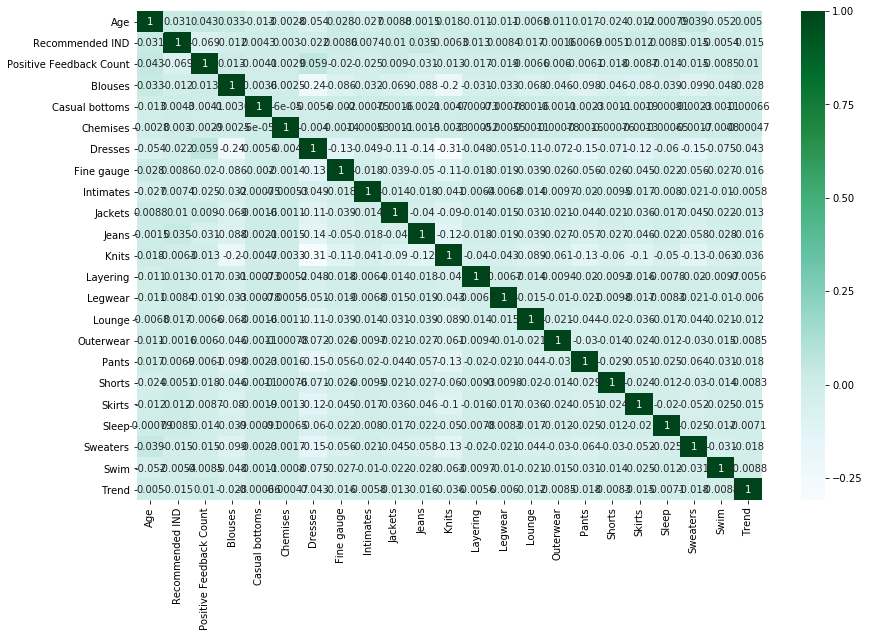

In [723]:
plt.subplots(figsize=(14, 9))
sns.heatmap(corrMat, cmap="BuGn", annot=True)
plt.show()

### Feature selection 

In [724]:
features = df_dummies.drop(['Recommended IND'], axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 22 columns):
Age                        23486 non-null int64
Positive Feedback Count    23486 non-null int64
Blouses                    23486 non-null uint8
Casual bottoms             23486 non-null uint8
Chemises                   23486 non-null uint8
Dresses                    23486 non-null uint8
Fine gauge                 23486 non-null uint8
Intimates                  23486 non-null uint8
Jackets                    23486 non-null uint8
Jeans                      23486 non-null uint8
Knits                      23486 non-null uint8
Layering                   23486 non-null uint8
Legwear                    23486 non-null uint8
Lounge                     23486 non-null uint8
Outerwear                  23486 non-null uint8
Pants                      23486 non-null uint8
Shorts                     23486 non-null uint8
Skirts                     23486 non-null uint8
Sleep                      

In [725]:
depVar = df_dummies['Recommended IND']
depVar.head()

0    1
1    1
2    0
3    1
4    1
Name: Recommended IND, dtype: int64

In [726]:
df_dummies['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [727]:
print(features.shape, depVar.shape)

(23486, 22) (23486,)


### Train / Test split

In [728]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size = 0.30, random_state = 15)

In [729]:
print (X_train.shape, X_test.shape)

(16440, 22) (7046, 22)


In [730]:
print(y_train.shape, y_test.shape)

(16440,) (7046,)


#### Null accuracy = 82% 

In [731]:
y_test.value_counts()

1    5820
0    1226
Name: Recommended IND, dtype: int64

In [732]:
y_test.value_counts().head(1) / len(y_test)

1    0.826001
Name: Recommended IND, dtype: float64

### Modeling 

In [733]:
modelKNN = KNeighborsClassifier()   
modelSVM = svm.SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()

#### Random Forest

In [734]:
RF = modelRF.fit(X_train, y_train)
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [735]:
RF_pred = RF.predict(X_test)

In [736]:
confusion_RF = skm.confusion_matrix(y_test, RF_pred)
print(confusion_RF)

[[  98 1128]
 [ 340 5480]]


In [737]:
TN_RF = confusion_RF[0, 0]
FP_RF = confusion_RF[0, 1]

In [738]:
print(" ***Random Forest***" ,'\n',"Accuracy",skm.accuracy_score(y_test, RF_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, RF_pred),'\n',"Sensitivity",skm.recall_score(y_test, RF_pred),'\n','Specificity',TN_RF/float(FP_RF + TN_RF),'\n',"Precision",skm.precision_score(y_test, RF_pred),'\n',"False Positive Rate",FP_RF/float(TN_RF + FP_RF))

 ***Random Forest*** 
 Accuracy 0.791654839625 
 Kappa 0.0288285094279 
 Sensitivity 0.941580756014 
 Specificity 0.0799347471452 
 Precision 0.829297820823 
 False Positive Rate 0.920065252855


In [739]:
print(RF.feature_importances_)

[  6.80838834e-01   2.38524726e-01   7.02132131e-03   5.16944123e-05
   0.00000000e+00   7.68795621e-03   3.73034643e-03   2.18399177e-03
   5.57562593e-03   4.33877290e-03   6.36625803e-03   2.39758751e-03
   1.96125909e-03   4.57774503e-03   4.64258804e-03   5.85662865e-03
   3.04533682e-03   4.36301474e-03   3.68397728e-03   5.78065920e-03
   4.64876518e-03   2.72291103e-03]


#### Support Vector Machine

In [740]:
SVM = modelSVM.fit(X_train, y_train)
SVM

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [741]:
SVM_pred = SVM.predict(X_test)

In [742]:
confusion_SVM = skm.confusion_matrix(y_test, SVM_pred)
print(confusion_SVM)

[[   1 1225]
 [   6 5814]]


In [743]:
TN_SVM = confusion_SVM[0, 0]
FP_SVM = confusion_SVM[0, 1]

In [744]:
print(" ***Support Vector Machine***" ,'\n',"Accuracy",skm.accuracy_score(y_test, SVM_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, SVM_pred),'\n',"Sensitivity",skm.recall_score(y_test, SVM_pred),'\n','Specificity',TN_SVM/float(FP_SVM + TN_SVM),'\n',"Precision",skm.precision_score(y_test, SVM_pred),'\n',"False Positive Rate",FP_SVM/float(TN_SVM + FP_SVM))

 ***Support Vector Machine*** 
 Accuracy 0.825290945217 
 Kappa -0.00035430262011 
 Sensitivity 0.998969072165 
 Specificity 0.000815660685155 
 Precision 0.825969597954 
 False Positive Rate 0.999184339315


#### K-Nearest Neighbors

In [745]:
KNN = modelKNN.fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [746]:
KNN_pred = KNN.predict(X_test)

In [747]:
confusion_KNN = skm.confusion_matrix(y_test, KNN_pred)
print(confusion_KNN)

[[  66 1160]
 [ 227 5593]]


In [748]:
TN_KNN = confusion_KNN[0, 0]
FP_KNN = confusion_KNN[0, 1]

In [749]:
print(" ***k Nearest Neighbor ***" ,'\n',"Accuracy",skm.accuracy_score(y_test, KNN_pred),'\n',"Kappa",skm.cohen_kappa_score(y_test, KNN_pred),'\n',"Sensitivity",skm.recall_score(y_test, KNN_pred),'\n','Specificity',TN_KNN/float(FP_KNN + TN_KNN),'\n',"Precision",skm.precision_score(y_test, KNN_pred),'\n',"False Positive Rate",FP_KNN/float(TN_KNN + FP_KNN))

 ***k Nearest Neighbor *** 
 Accuracy 0.803150723815 
 Kappa 0.0211965861273 
 Sensitivity 0.960996563574 
 Specificity 0.0538336052202 
 Precision 0.828224492818 
 False Positive Rate 0.94616639478
